# Importing libs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import random
import re
import string

import scipy.spatial
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split


import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import ngrams


from tqdm import tqdm
from pprint import pprint

import sys
import os
import glob
# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'


In [2]:
PATH = '../Goodreads data'

In [3]:
# Here all files 
for name in glob.glob(PATH + '/*'):
    print(name)

../Goodreads data\popular_quotes.csv
../Goodreads data\quotes_of_books.csv
../Goodreads data\quotes_of_death.csv
../Goodreads data\quotes_of_education.csv
../Goodreads data\quotes_of_faith.csv
../Goodreads data\quotes_of_god.csv
../Goodreads data\quotes_of_happiness.csv
../Goodreads data\quotes_of_hope.csv
../Goodreads data\quotes_of_humor.csv
../Goodreads data\quotes_of_inspiration.csv
../Goodreads data\quotes_of_inspirational.csv
../Goodreads data\quotes_of_knowledge.csv
../Goodreads data\quotes_of_life.csv
../Goodreads data\quotes_of_love.csv
../Goodreads data\quotes_of_motivational.csv
../Goodreads data\quotes_of_philosophy.csv
../Goodreads data\quotes_of_poetry.csv
../Goodreads data\quotes_of_quotes.csv
../Goodreads data\quotes_of_relationships.csv
../Goodreads data\quotes_of_religion.csv
../Goodreads data\quotes_of_romance.csv
../Goodreads data\quotes_of_science.csv
../Goodreads data\quotes_of_spirituality.csv
../Goodreads data\quotes_of_success.csv
../Goodreads data\quotes_of_ti

## Working with each quote label, one quote for one label

As we sow we have a lot of csv file, which is contains a quotes for exact label.



We want to make just `N-class` like sentiment, and will updata each class with some quotes which is relate to this class.

* Class `love` -> love + poetry + romance + relationships
* Class `motivation` -> life + inspirational + hope + success

* Class `wisdom` -> truth + faith + wisdom + spirituality

And make a multi-class classification model for this project

In [4]:
love_quotes = ['love' , 'poetry' , 'romance' , 'relationships']
motivation_quotes = ['hope', 'life' , 'inspirational' , 'success']
wisdom_quotes = ['wisdom', 'truth' , 'faith' , 'spirituality']


# Customize data

### Make a love class

In [5]:
pd.read_csv(PATH + '/quotes_of_love.csv')

,quotes
0,"I'm selfish, impatient and a little insecure. ..."
1,You've gotta dance like there's nobody watchin...
2,You know you're in love when you can't fall as...
3,A friend is someone who knows all about you an...
4,Darkness cannot drive out darkness: only light...
...,...
2995,I'm not so stupid as to believe that you've co...
2996,I would kiss you in the middle of the ocean du...
2997,"No, I'm not mistaken. I know you don't love me..."
2998,"It seems to me that our three basic needs, for..."


In [6]:
# quotes_of_love.csv
love_list = []
for q in love_quotes:
    path = PATH + "/quotes_of_" + q + ".csv"
    name = "quotes_of_" + q
    df = pd.read_csv(path)
    li = df['quotes'].values
    for row in li:
        love_list.append(row)
    

love_list[0]

"I'm selfish, impatient and a little insecure. I make mistakes, I am out of control and at times hard to handle. But if you can't handle me at my worst, then you sure as hell don't deserve me at my best."

In [7]:
len(love_list)

11970

In [8]:
# There is no none values
None in love_list

False

### Make a motivation class

In [9]:
motive_list = []
for q in motivation_quotes:
    path = PATH + "/quotes_of_" + q + ".csv"
    name = "quotes_of_" + q
    df = pd.read_csv(path)
    li = df['quotes'].values
    for row in li:
        motive_list.append(row)
    

motive_list[0]

'Yesterday is history, tomorrow is a mystery, today is a gift of God, which is why we call it the present.'

In [10]:
len(motive_list)

12000

In [11]:
# There is no none values
None in motive_list

False

### Make a wisdom class

In [12]:
wisdom_list = []
for q in wisdom_quotes:
    path = PATH + "/quotes_of_" + q + ".csv"
    name = "quotes_of_" + q
    df = pd.read_csv(path)
    li = df['quotes'].values
    for row in li:
        wisdom_list.append(row)
    

wisdom_list[0]

'It is better to remain silent at the risk of being thought a fool, than to talk and remove all doubt of it.'

In [13]:
len(wisdom_list)

11970

In [14]:
# There is no none values
None in wisdom_list

False

### Collect quotes and labels

**Make all three classes in one list**

In [15]:
quotes = love_list + motive_list + wisdom_list

In [16]:
len(quotes)

35940

**Makes a labels for each class and collect them in one list**

In [17]:
print(len(love_list) , len(motive_list), len(wisdom_list))

11970 12000 11970


**What about label?**


I can make a lable of each class, by knowing the size of each one and make a list contain all classes.



In [18]:
labels = []
love = ['love' for i in range(len(love_list))]                   ## ading love label
motivation = ['motivation' for i in range(len(motive_list))]     ## ading motivation label
wisdom = ['wisdom' for i in range(len(wisdom_list))]             ## ading motivation label
labels = love + motivation + wisdom
len(labels)

35940

In [19]:
labels[0], labels[len(motive_list)+1], labels[-1]

('love', 'motivation', 'wisdom')

In [20]:
# They have the same length
len(quotes), len(labels)

(35940, 35940)

**Shuffel quotes and labes for modeling**

In [22]:
shuffled_data = list(zip(quotes, labels))
random.shuffle(shuffled_data)
quotes, labels = zip(*shuffled_data)

In [23]:
len(quotes), len(labels)

(35940, 35940)

In [24]:
print(quotes[0])
print(labels[0])

Someone once wrote that a novel should deliver a series of small astonishments. I get the same thing spending an hour with you.
love


### Make a dataframe for exact style

In [25]:
data = pd.DataFrame({'quotes': quotes,
                     'class': labels})
data.head()

,quotes,class
0,Someone once wrote that a novel should deliver...,love
1,The sun loved me again when it saw that the st...,love
2,A bridge of silver wings stretches from the de...,wisdom
3,God turns you from one feeling to another and ...,love
4,"Time is exceptionally finite, and we must be m...",motivation


In [26]:
data.shape

(35940, 2)

# EDA

In [27]:
# Missing Values  -> there is no null values
data.isnull().sum()

quotes    0
class     0
dtype: int64

In [28]:
data['class'].value_counts()

motivation    12000
wisdom        11970
love          11970
Name: class, dtype: int64

In [29]:
data['class'].value_counts(normalize = True)

motivation    0.333890
wisdom        0.333055
love          0.333055
Name: class, dtype: float64

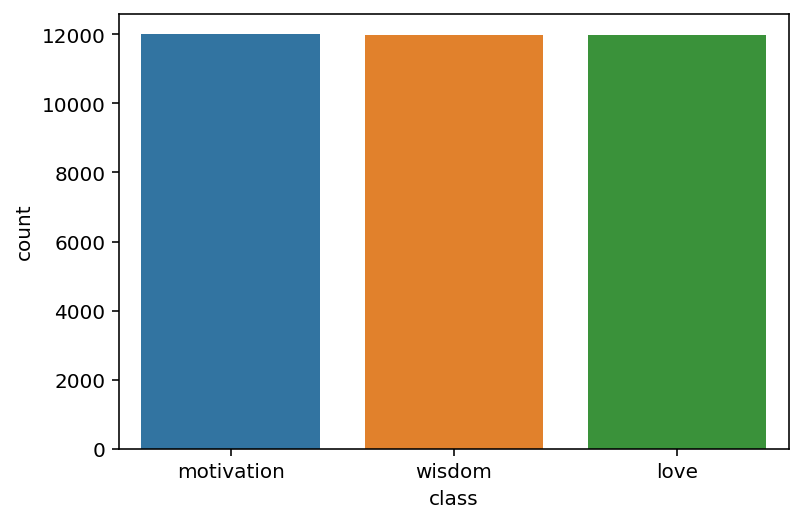

In [30]:
sns.countplot(data= data, x= 'class',
             order = data['class'].value_counts().index);

**Examples of each class**

In [31]:
# Love class
print('--Love class example:--\n', data[data['class'] == 'love']['quotes'].values[0])

# Motivation class
print('--Motivation class example:--\n', data[data['class'] == 'motivation']['quotes'].values[0])

# Wisdom class
print('--Wisdom class example:--\n', data[data['class'] == 'wisdom']['quotes'].values[0])

--Love class example:--
 Someone once wrote that a novel should deliver a series of small astonishments. I get the same thing spending an hour with you.
--Motivation class example:--
 Time is exceptionally finite, and we must be mindful how we invest what remains for us.
--Wisdom class example:--
 A bridge of silver wings stretches from the dead ashes of an unforgiving nightmare
to the jeweled vision of a life started anew.


# Text Data Preprocessing
We need to pre-process the data to get it all in a consistent format.We need to clean, tokenize and convert our data into a matrix. Let's create a function which will perform the following tasks on the text columns:

* Tokenizes
* Make text lowercase
* Removes hyperlinks
* Remove punctuation
* Removes numbers
* Removes useless words "stopwords"
* Stemming/Lemmatization


In [32]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\ahmed
[nltk_data]     eltabakh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [35]:
stop_words = stopwords.words('english')
stemmer    = nltk.SnowballStemmer("english")

In [36]:
def clean_text(text):
    '''
        Make text lowercase, remove text in square brackets,remove links,remove punctuation
        and remove words containing numbers.
    '''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # remove punctuation
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [37]:
def preprocess_data(text):
    text = clean_text(text)                                                     # Clean puntuation, urls, and so on
    text = ' '.join(word for word in text.split() if word not in stop_words)    # Remove stopwords
    text = ' '.join(stemmer.stem(word) for word in text.split())                # Stemm all the words in the sentence
    return text

In [38]:
data['clean_text'] = data['quotes'].apply(preprocess_data)
data.head()

,quotes,class,clean_text
0,Someone once wrote that a novel should deliver...,love,someon wrote novel deliv seri small astonish g...
1,The sun loved me again when it saw that the st...,love,sun love saw star would abandon
2,A bridge of silver wings stretches from the de...,wisdom,bridg silver wing stretch dead ash unforgiv ni...
3,God turns you from one feeling to another and ...,love,god turn one feel anoth teach mean opposit two...
4,"Time is exceptionally finite, and we must be m...",motivation,time except finit must mind invest remain us


**Convert sentiment to numerical variable**


In [39]:
data['label'] = data['class'].map({'love': 0,
                                'motivation': 1,
                                'wisdom': 2})
data.head()

,quotes,class,clean_text,label
0,Someone once wrote that a novel should deliver...,love,someon wrote novel deliv seri small astonish g...,0
1,The sun loved me again when it saw that the st...,love,sun love saw star would abandon,0
2,A bridge of silver wings stretches from the de...,wisdom,bridg silver wing stretch dead ash unforgiv ni...,2
3,God turns you from one feeling to another and ...,love,god turn one feel anoth teach mean opposit two...,0
4,"Time is exceptionally finite, and we must be m...",motivation,time except finit must mind invest remain us,1


# Analyzing Text Statistics

We can now do some statistical analysis to explore the data like:

* Text length analysis.
    * length for whole sentence, # of each character in the sentence.
    * count # of word in each sentence.
* word frequency analysis

In [40]:
data['text_n_chars'] = data.clean_text.apply(len) # count all chars in each sentence
data['text_n_words'] = data.clean_text.apply(lambda sent: len(sent.split())) # count number of words in each sentence
data.head()

,quotes,class,clean_text,label,text_n_chars,text_n_words
0,Someone once wrote that a novel should deliver...,love,someon wrote novel deliv seri small astonish g...,0,65,11
1,The sun loved me again when it saw that the st...,love,sun love saw star would abandon,0,31,6
2,A bridge of silver wings stretches from the de...,wisdom,bridg silver wing stretch dead ash unforgiv ni...,2,84,13
3,God turns you from one feeling to another and ...,love,god turn one feel anoth teach mean opposit two...,0,59,12
4,"Time is exceptionally finite, and we must be m...",motivation,time except finit must mind invest remain us,1,44,8


In [41]:
max(data['text_n_words']), min(data['text_n_words'])

(398, 0)

In [42]:
data['text_n_words'].value_counts()

6      2422
8      2316
7      2278
5      2268
9      1991
       ... 
398       1
169       1
290       1
226       1
231       1
Name: text_n_words, Length: 232, dtype: int64

**The distribution of number of words for each class.**

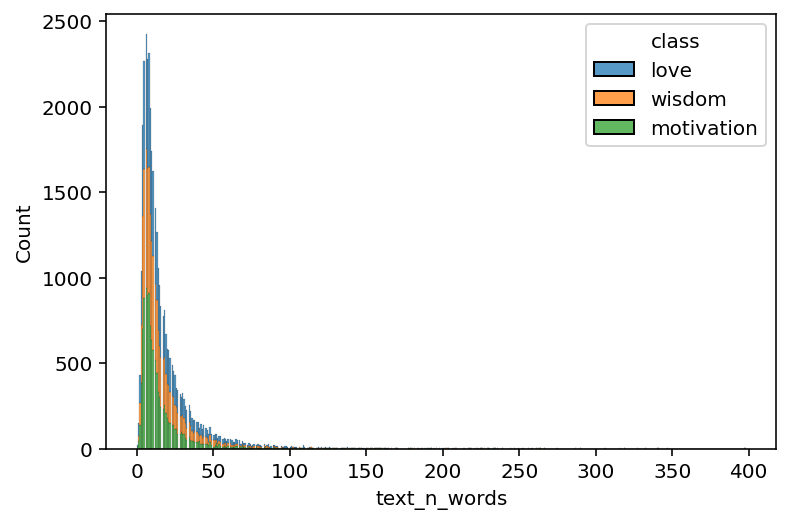

In [43]:
sns.histplot(data= data, x= 'text_n_words', hue= 'class', multiple= 'stack');

We will make each sent > 100 = 100 

In [44]:
data['text_n_words'] = data['text_n_words'].apply(lambda x : 100 if x > 100 else x)

In [45]:
max(data['text_n_words']), min(data['text_n_words'])

(100, 0)

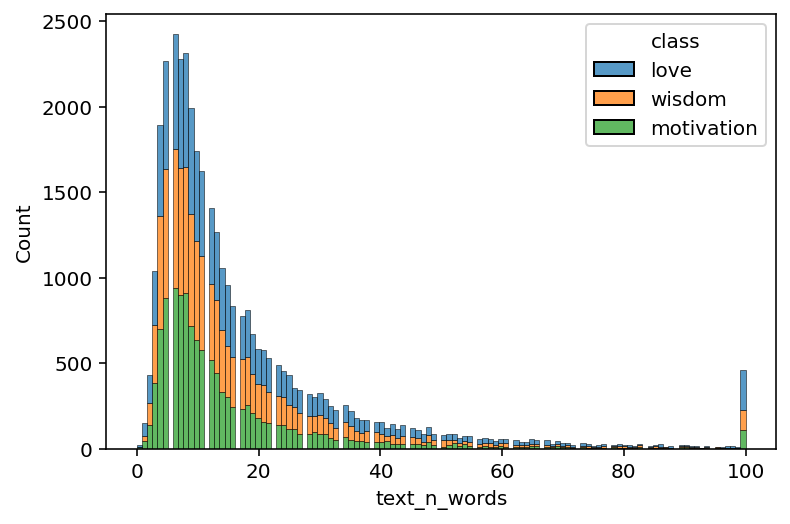

In [46]:
sns.histplot(data= data, x= 'text_n_words', hue= 'class', multiple= 'stack');

## Most frequent words

In [47]:
from collections import Counter

In [48]:
def freq_words(text, c, num):
    '''
        take the whole data, and return data which is have # of words in each sentiment has been passed
    '''
    words = [word for sent in text[text['class'] == c]['clean_text'] for word in sent.split()]
    freq_words = Counter(words)
    freq_words_sorted = sorted(freq_words.items(), key=lambda pair: pair[1], reverse=True)
    freq_words_df = pd.DataFrame(freq_words_sorted[:num], columns=['word', 'counts'])
    return freq_words_df

In [49]:
def plot_freq(data, st):
    '''
        take the data, and st refeere to kind of sentiment
    '''
    plt.figure(figsize=(12, 6))
    sns.barplot(data= data , x= 'counts', y= 'word')
    plt.title(f'Top 20 words in {st} quotes')
    plt.show();

### Frequent words for each love class

In [50]:
love_words = freq_words(data, 'love', 20)
love_words.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
word,love,like,one,want,know,life,time,never,would,make,feel,thing,go,heart,peopl,think,could,way,look,say
counts,5946,2305,2195,1781,1688,1376,1318,1308,1219,1204,1181,1172,1091,1066,1043,1039,996,981,942,923


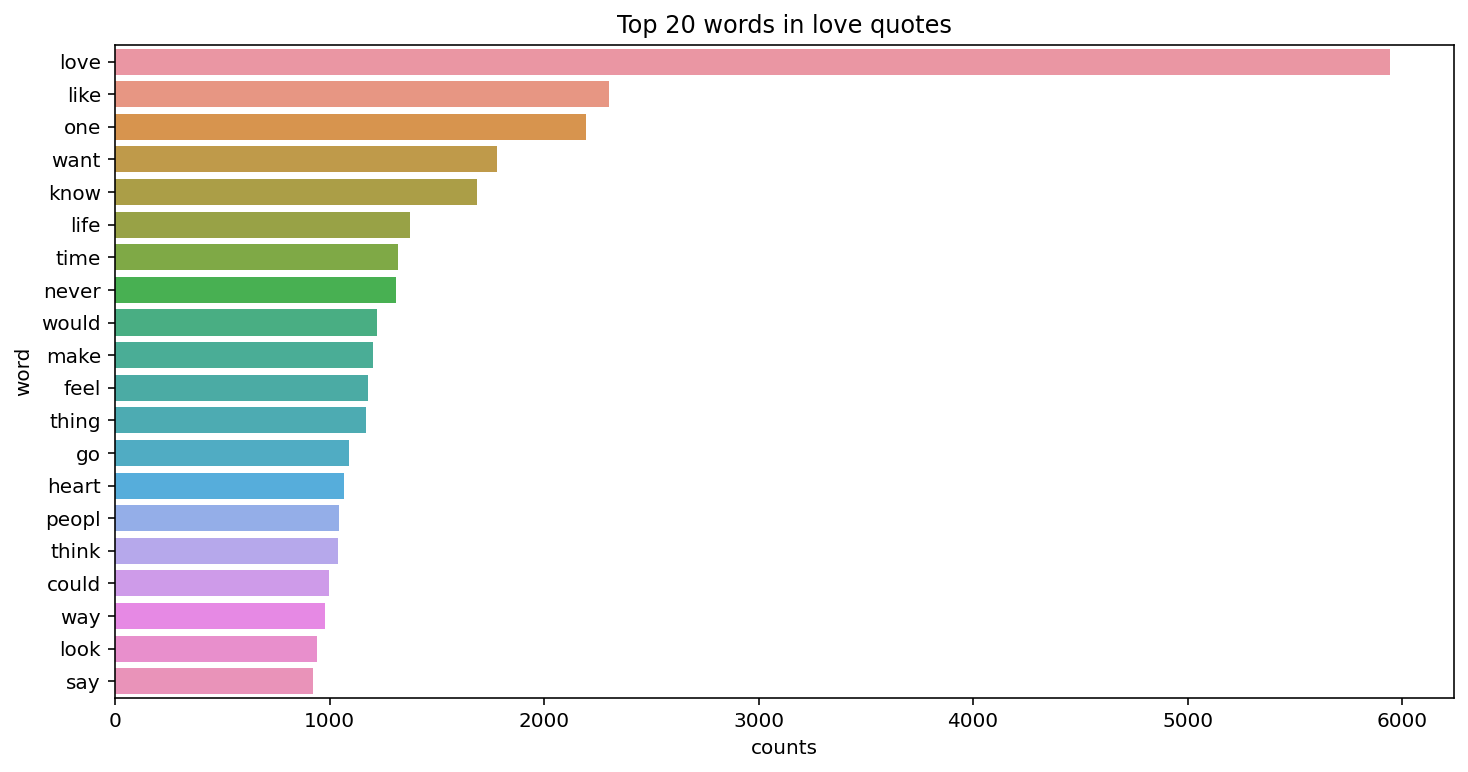

In [51]:
plot_freq(love_words, 'love')

### Frequent words for each motivation class

In [52]:
motivation_words = freq_words(data, 'motivation', 20)
motivation_words.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
word,life,one,thing,live,love,peopl,hope,make,success,time,like,never,know,world,us,want,go,get,dont,way
counts,2962,1751,1509,1432,1412,1376,1345,1321,1312,1205,1112,1096,1091,1046,1037,1016,989,903,901,843


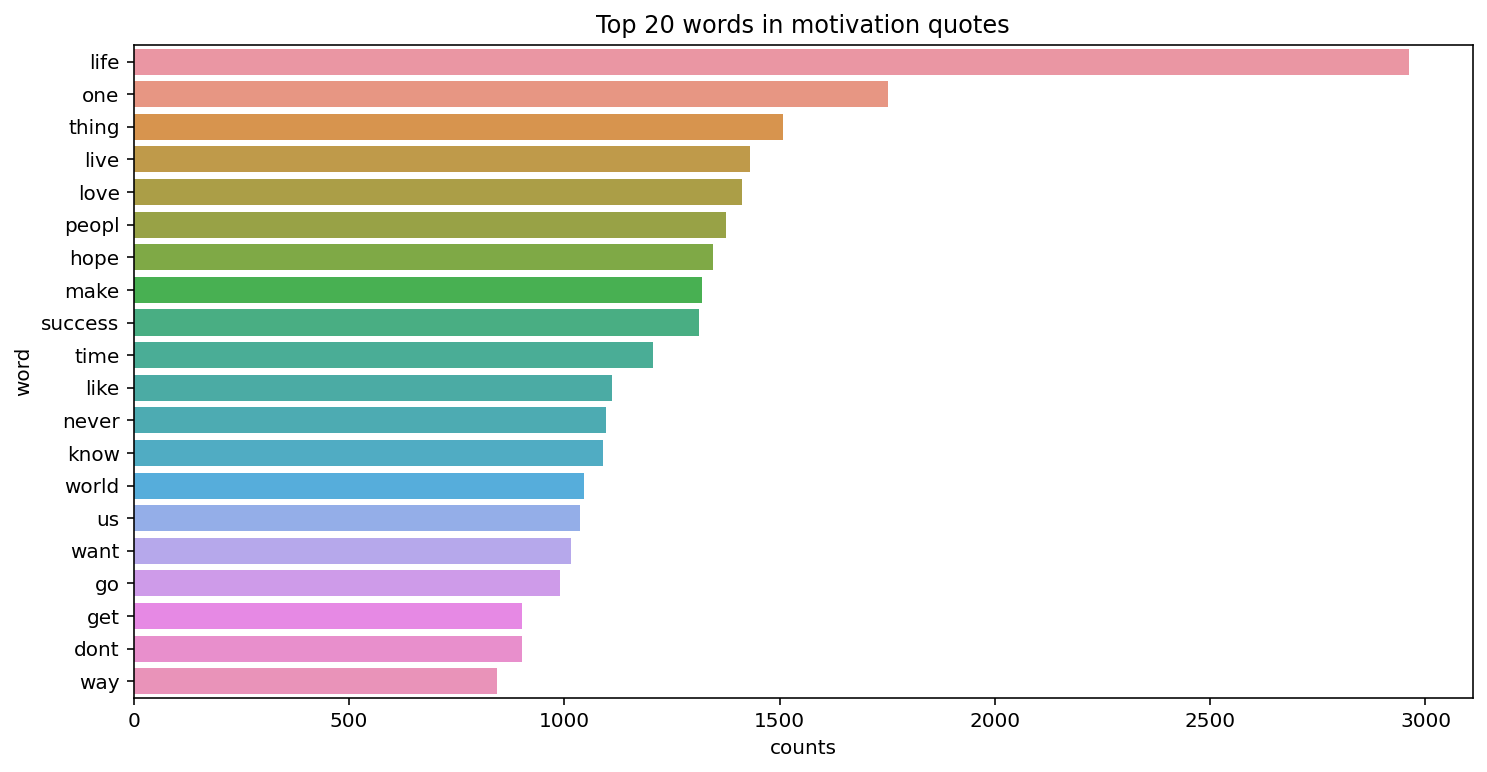

In [53]:
plot_freq(motivation_words, 'motivation')

### Frequent words for each wisdom class

In [54]:
wisdom_words = freq_words(data, 'wisdom', 20)
wisdom_words.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
word,god,truth,one,life,faith,love,thing,know,us,peopl,like,make,world,live,time,believ,way,never,see,think
counts,2128,2126,2043,1818,1754,1630,1465,1360,1338,1334,1159,1068,1045,1023,949,883,878,874,852,819


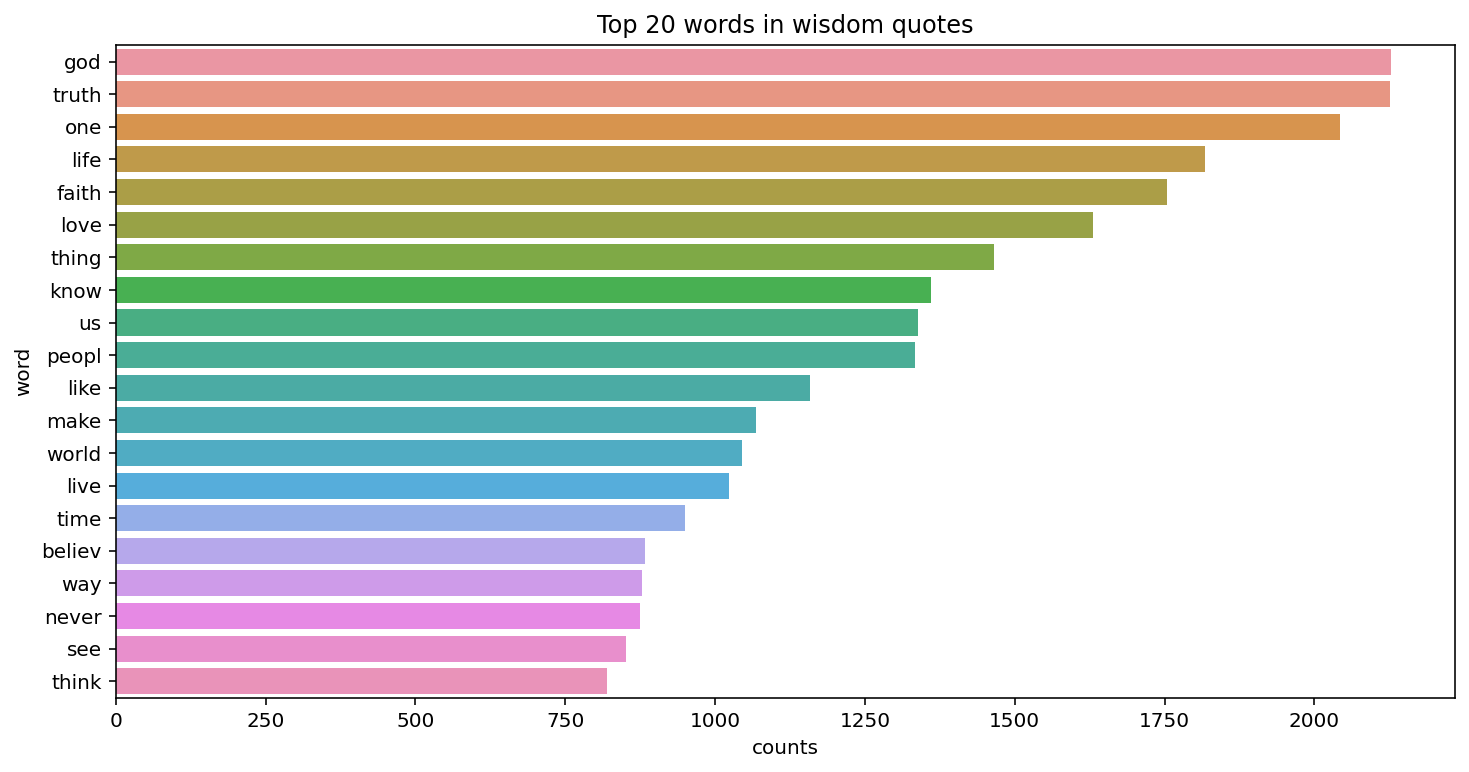

In [55]:
plot_freq(wisdom_words, 'wisdom')

## Distribution of top n-grams

In [56]:
def get_top_n_gram(corpus, c,  n_gram, top_n=None):
    
    # list of splited senteces, which is just list of words
    text = [word for sent in corpus[corpus['class'] == c]['clean_text'] for word in sent.split()]

    grams = ngrams(text, n_gram)
    grams = (' '.join(g) for g in grams)
    num_of_grams = [words for words in grams]
    freq_words = Counter(num_of_grams)
    freq_words_sorted = sorted(freq_words.items(), key=lambda pair: pair[1], reverse=True)
    freq_words_df = pd.DataFrame(freq_words_sorted[:top_n], columns=['word', 'counts'])
    return freq_words_df[:top_n]

### Two-grams for love quotes

In [57]:
love_2_gram = get_top_n_gram(data, 'love', 2, 20)
love_2_gram.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
word,love love,fall love,let go,love someon,dont know,feel like,love one,dont want,love like,look like,someon els,know love,one day,one anoth,make love,two peopl,everi day,true love,one thing,one love
counts,258,175,140,129,123,120,99,91,90,90,81,80,78,78,74,73,71,68,67,61


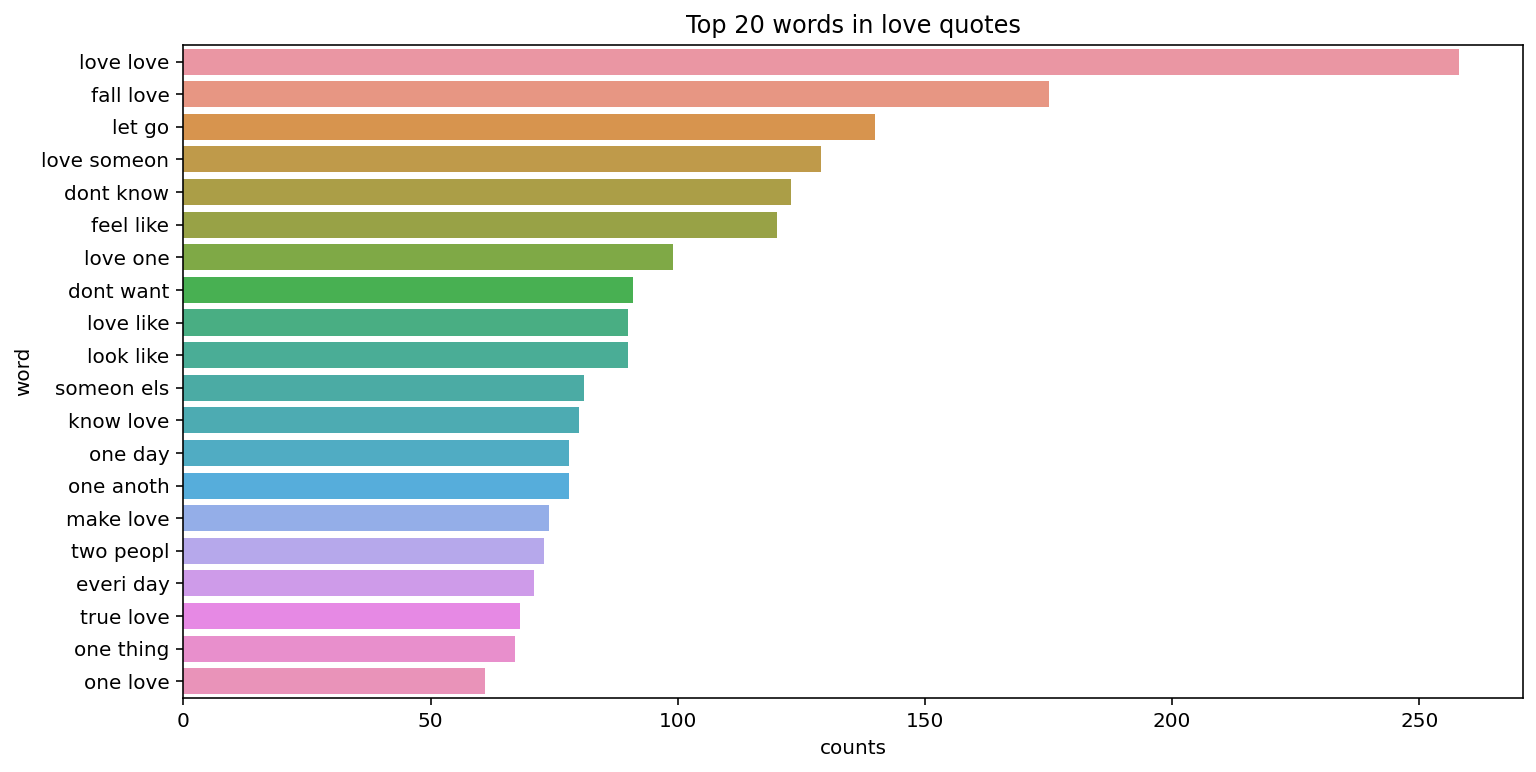

In [58]:
plot_freq(love_2_gram, 'love')

### Two-grams for motivation quotes

In [59]:
motivation_2_gram = get_top_n_gram(data, 'motivation', 2, 20)
motivation_2_gram.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
word,let go,live life,everi day,one day,dont know,someon els,one thing,thing happen,feel like,love love,move forward,find way,good thing,peopl think,mani peopl,make feel,success life,success peopl,make mistak,your go
counts,106,97,95,92,80,79,64,64,62,56,54,49,48,48,46,46,44,44,44,44


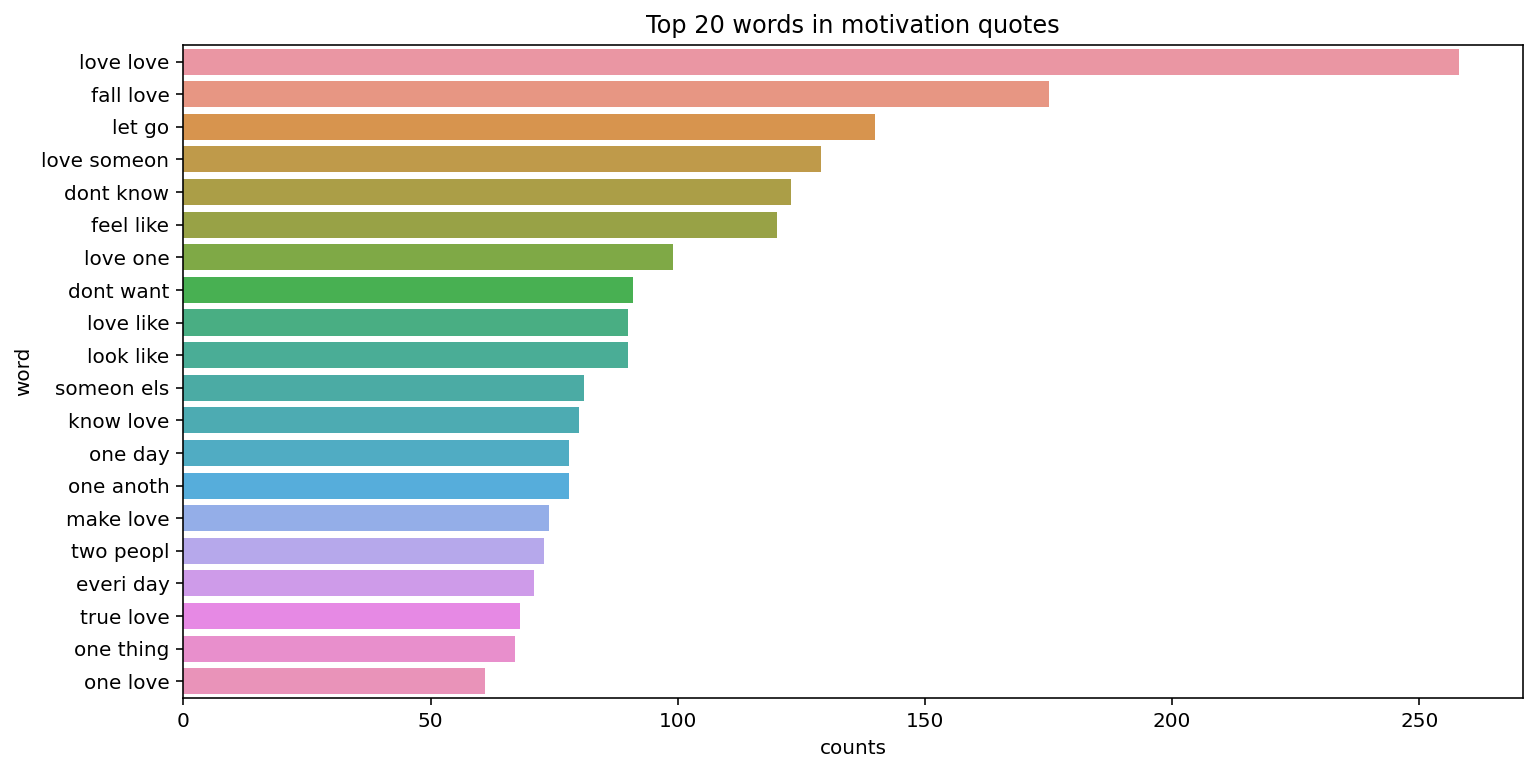

In [60]:
plot_freq(love_2_gram, 'motivation')

### Two-grams for wisdom quotes

In [61]:
wisdom_2_gram = get_top_n_gram(data, 'wisdom', 2, 20)
wisdom_2_gram.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
word,let go,tell truth,one thing,human be,feel like,faith god,dont know,believ god,live life,someon els,love one,truth truth,tell us,one anoth,make us,one day,make feel,faith faith,give us,god love
counts,106,86,77,72,67,64,63,61,56,55,50,50,50,48,46,46,45,44,44,42


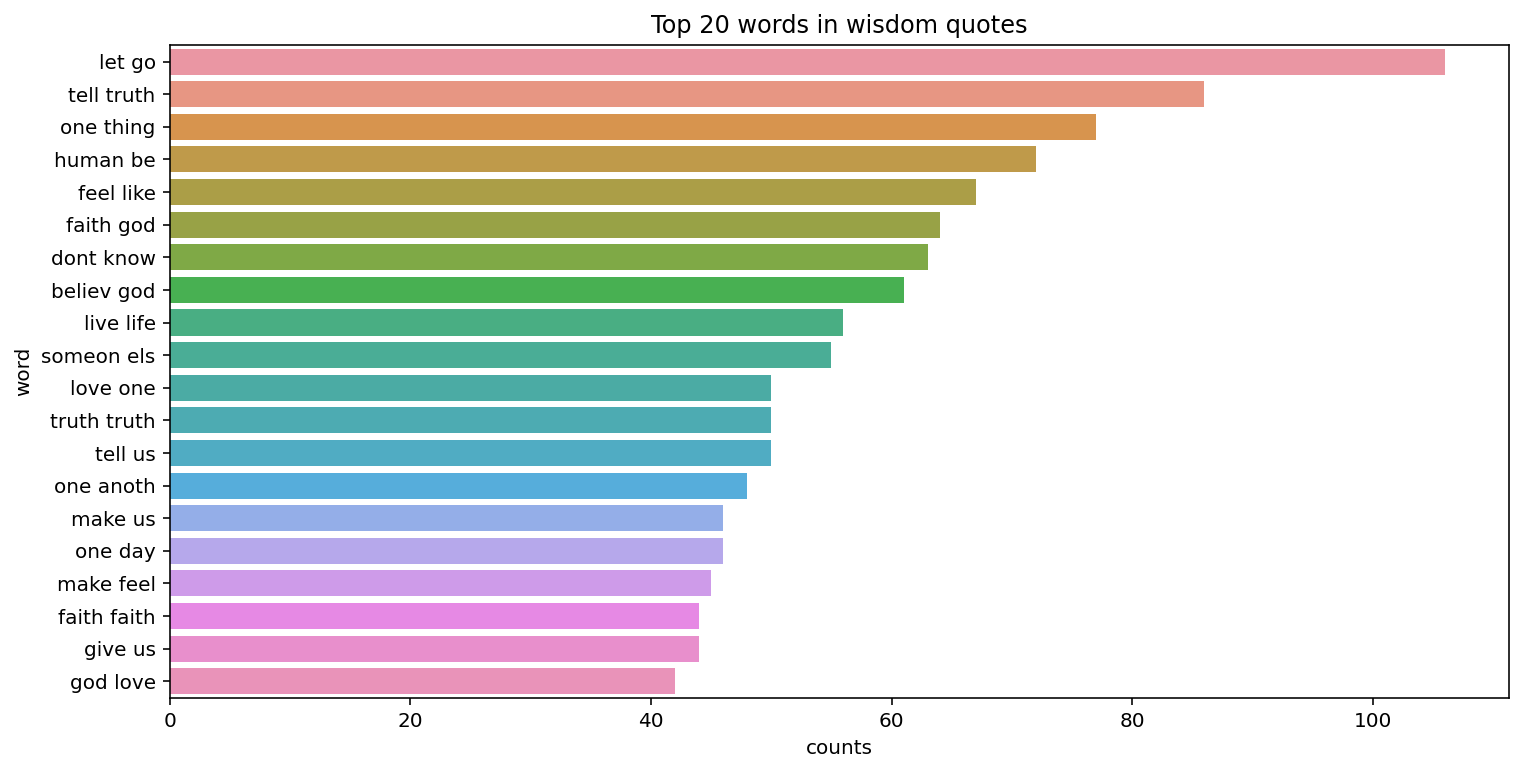

In [62]:
plot_freq(wisdom_2_gram, 'wisdom')

**We can easily make tri-grams for sentiment using this function `get_top_n_gram` by passing `n_gram = 3`**

## Word Cloud

In [63]:
# getting list of love quotes
love_text_clean = data[data['class' ] == 'love']['clean_text']
love_clean_words = [word for words in love_text_clean for word in words.split()]

In [64]:
# getting list of motivation quotes
motivation_text_clean = data[data['class' ] == 'motivation']['clean_text']
motivation_clean_words = [word for words in motivation_text_clean for word in words.split()]

In [65]:
# getting list of wisdom quotes
wisdom_text_clean = data[data['class' ] == 'wisdom']['clean_text']
wisdom_clean_words = [word for words in wisdom_text_clean for word in words.split()]

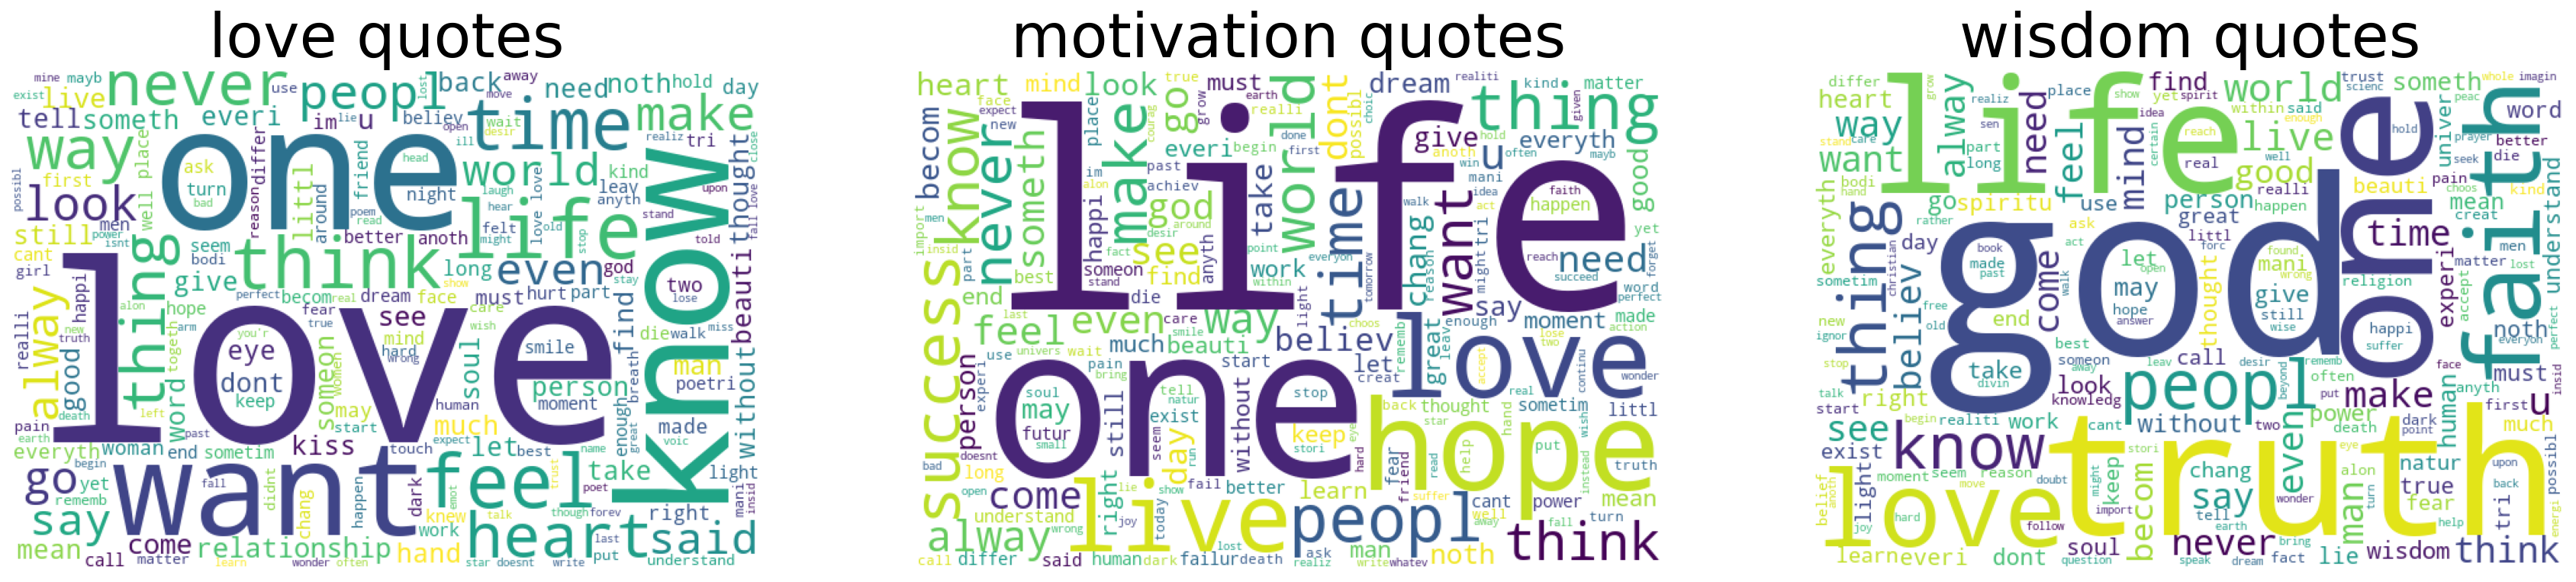

In [67]:
from wordcloud import WordCloud
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=[30, 15])
wordcloud1 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(love_clean_words))
ax1.imshow(wordcloud1)
ax1.axis('off')
ax1.set_title('love quotes',fontsize=40);

wordcloud2 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(motivation_clean_words))
ax2.imshow(wordcloud2)
ax2.axis('off')
ax2.set_title('motivation quotes',fontsize=40);

wordcloud3 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(wisdom_clean_words))
ax3.imshow(wordcloud3)
ax3.axis('off')
ax3.set_title('wisdom quotes',fontsize=40);

# Working with one quote for muli-label

In [68]:
quotes_multi_label_data = pd.read_csv(PATH + '/popular_quotes.csv')
quotes_multi_label_data.head()

,quotes,tags
0,Be yourself; everyone else is already taken.,"['attributed-no-source', 'be-yourself', 'hones..."
1,"I'm selfish, impatient and a little insecure. ...","['attributed-no-source', 'best', 'life', 'love..."
2,Two things are infinite: the universe and huma...,"['attributed-no-source', 'human-nature', 'humo..."
3,"So many books, so little time.","['books', 'humor']"
4,A room without books is like a body without a ...,"['attributed-no-source', 'books', 'simile', 's..."


In [69]:
print(quotes_multi_label_data['tags'][0])
print(type(quotes_multi_label_data['tags'][0]))
print(quotes_multi_label_data['tags'][0][0]) # print char instate of str as a tag word

['attributed-no-source', 'be-yourself', 'honesty', 'inspirational', 'misattributed-oscar-wilde']
<class 'str'>
[


In [70]:
# make a preprocessing pipeline 
quotes_multi_label_data['clean_text'] = quotes_multi_label_data['quotes'].apply(preprocess_data)

# remove ' and , from the string and [] and spliting the tags
quotes_multi_label_data['tags'] = quotes_multi_label_data['tags'].apply(lambda tags: tags.replace("'","").replace(",","")[1:-1].split())

# get the len of number of tags in each quote
quotes_multi_label_data['n_tags'] = quotes_multi_label_data['tags'].apply(lambda tags: len(tags))
quotes_multi_label_data.head()

,quotes,tags,clean_text,n_tags
0,Be yourself; everyone else is already taken.,"[attributed-no-source, be-yourself, honesty, i...",everyon els alreadi taken,5
1,"I'm selfish, impatient and a little insecure. ...","[attributed-no-source, best, life, love, mista...",im selfish impati littl insecur make mistak co...,8
2,Two things are infinite: the universe and huma...,"[attributed-no-source, human-nature, humor, in...",two thing infinit univers human stupid im sure...,8
3,"So many books, so little time.","[books, humor]",mani book littl time,2
4,A room without books is like a body without a ...,"[attributed-no-source, books, simile, soul]",room without book like bodi without soul,4


In [71]:
print(quotes_multi_label_data['tags'][0])
print(type(quotes_multi_label_data['tags'][0]))
print(quotes_multi_label_data['tags'][0][0]) # print char instate of str as a tag word

['attributed-no-source', 'be-yourself', 'honesty', 'inspirational', 'misattributed-oscar-wilde']
<class 'list'>
attributed-no-source


Here we converted the list as a string to actual list type

### Distribution on number of tags

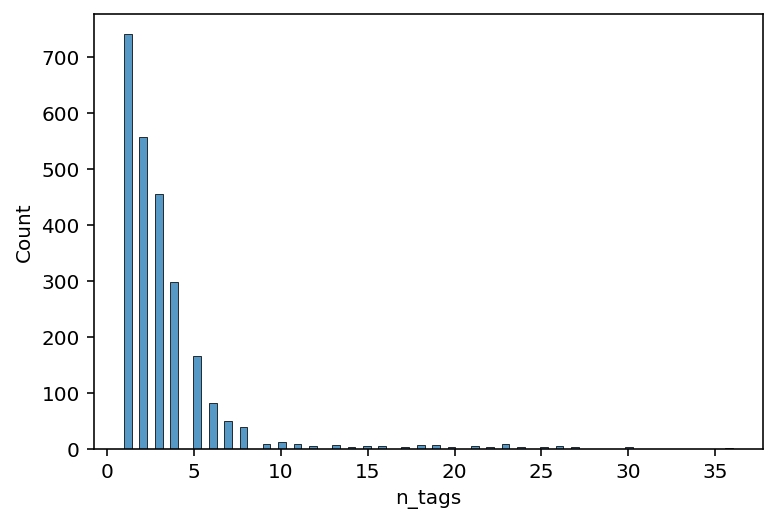

In [72]:
sns.histplot(data= quotes_multi_label_data, x= 'n_tags');

### Make a list of frequent tags

In [73]:
tag_list = [word for sent in quotes_multi_label_data['tags'] for word in sent]

In [74]:
freq_tags = Counter(tag_list)
freq_tags_sorted = sorted(freq_tags.items(), key=lambda pair: pair[1], reverse=True)
freq_tags_df = pd.DataFrame(freq_tags_sorted[:20], columns=['word', 'counts'])
freq_tags_df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
word,love,inspirational,life,humor,books,inspiration,reading,happiness,writing,inspirational-quotes,friendship,wisdom,philosophy,truth,attributed-no-source,optimism,living,life-quotes,hope,death
counts,319,318,294,253,136,85,84,66,66,65,63,62,59,57,53,48,48,48,46,46


### Top most tags quotes 

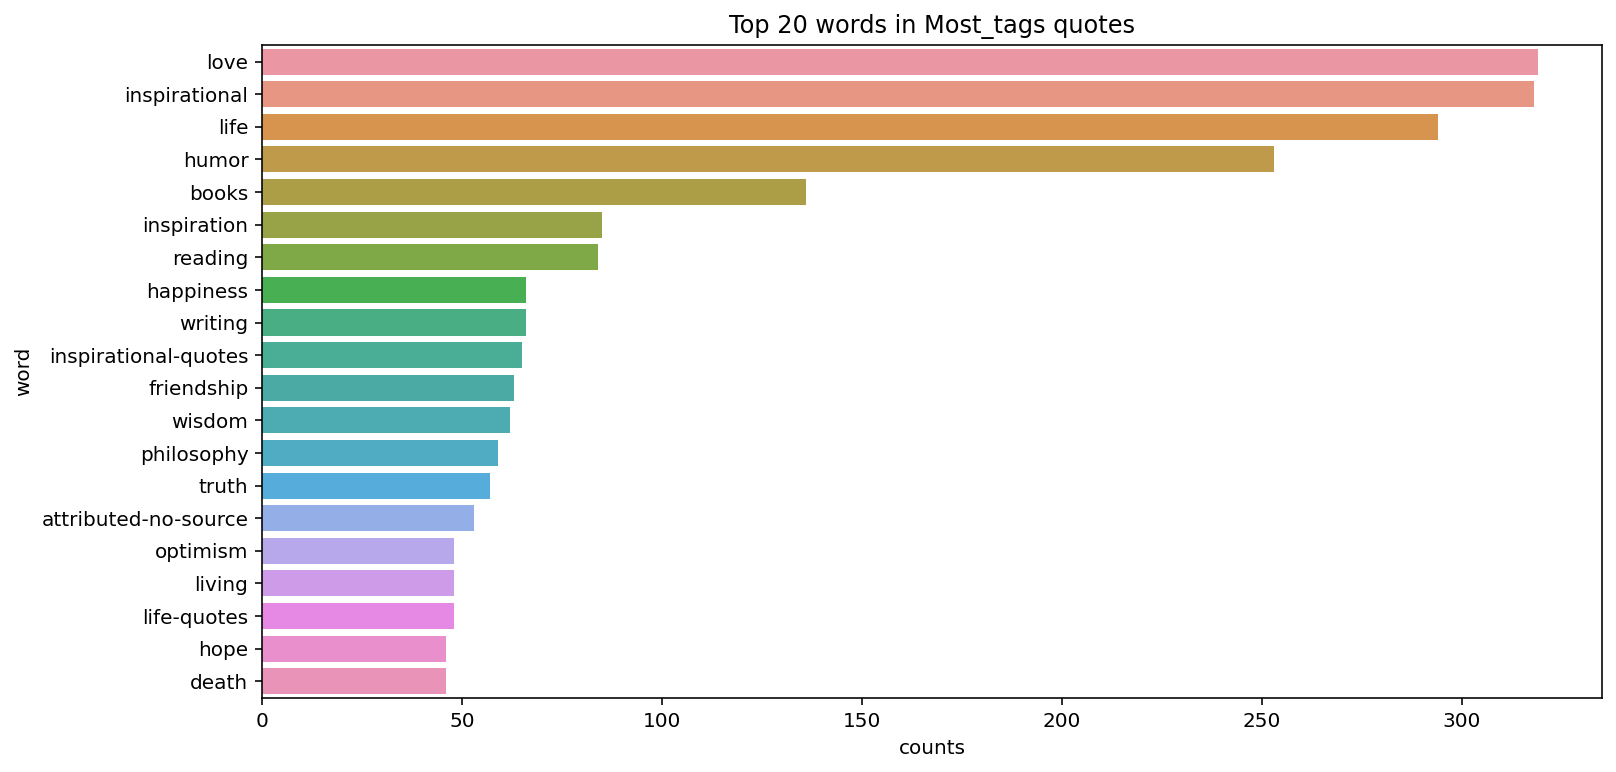

In [75]:
plot_freq(freq_tags_df, 'Most_tags')

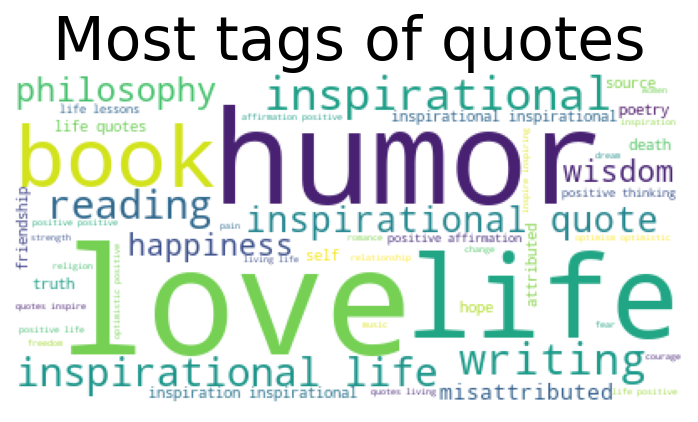

In [76]:
wordcloud = WordCloud( background_color='white', max_words= 50).generate(" ".join(tag_list))
plt.title('Most tags of quotes',fontsize=30)
plt.imshow(wordcloud)
plt.axis("off")
plt.show();